<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal en Keras

Para crear una red neuronal en Keras, podemos seguir los siguientes pasos fáciles:

    - Definir nuestra estructura de red
    - Compilar nuestro modelo
    - Ajustar nuestro modelo 

¡Intentémoslo en un problema de clasificación!

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [14]:
# Get data
df = pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/nba_logreg.csv', index_col='Name')
df.head()


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


*La columna objetivo se define como:*   

*   y = 0 si los años de carrera jugados es < 5
*   y = 1 si los años de carrera jugados es >= 5


    

In [15]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)



*Entrenamiento de datos*

In [16]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



*Definicion de la estructura de red*

In [18]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
print('la cantidad de caracteristicas (cols) es:',input_shape)


la cantidad de caracteristicas (cols) es: 19


*Modelo sequencial*

In [19]:
# Sequential model
model = Sequential()


*Agregacion de capas ocultas (2), numero de neuronas (19,10) y capa de salida*

In [21]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))



*Compilamiento del modelo con optomizador adam*

In [22]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

*Ajuste del modelo*

In [23]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)



Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 0.7351 - val_loss: 0.7024
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6923 - val_loss: 0.6885
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6866 - val_loss: 0.6835
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6831 - val_loss: 0.6788
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6791 - val_loss: 0.6734
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6731 - val_loss: 0.6658
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6650 - val_loss: 0.6587
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6570 - val_loss: 0.6526
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6485 - val_loss: 0.6403
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6282 - val_loss: 0.6144


*visualizacion de datos perdidos*

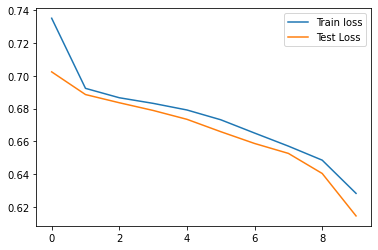

In [24]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



*Podemos observar que a medida que aumentamos el número de épocas para que el entrenamos nuestro modelo, tanto la pérdida de entrenamiento como la de validación disminuya. Esto es exactamente lo que queremos, ya que queremos que la pérdida sea lo más bajo posible. En la realidad, queremos ejecutar nuestro modelo para más de 10 épocas.*